### Lab no 3
**Linear Regression**
**22-CP-23**

### Tasks

## Question no 1:
**1. What does the slope (β1) indicate for this dataset?**

Each slope coefficient represents how much the house price changes for a one-unit increase in each independent variable while keeping others constant.

## Question no 2:
**2. How well does the model predict y based on the R^2value?**

The R² value indicates how well the independent variables explain the variation in house prices. A high R² suggests a good fit, while a low R² suggests the model does not explain much of the variation.

## Question no 3:
**3. Are there any patterns in the residuals that violate linear regression assumptions?**

Residuals should be randomly distributed with constant variance and no clear pattern. If there are trends or increasing spread, it may indicate issues like heteroscedasticity or non-linearity, violating linear regression assumptions.

## Examples

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("housing.csv")
print("First 5 rows of the dataset:") 
print(data.head())

First 5 rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake 

In [4]:
# Selecting independent (X) and dependent (y) variables 
X = data[['Avg. Area House Age']] # Independent variable 
y = data['Price'] # Dependent variable 
# Check for missing values print("\nMissing values in the dataset:") 
print(data.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [6]:
#train and test model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the linear regression model 
reg = LinearRegression() 
model.fit(X_train, y_train)
# Print model parameters 
print("Slope m:", model.coef_)
print("Intercept b:", model.intercept_)

Slope m: [159880.41760501]
Intercept b: 274542.93016851414


In [9]:
y_pred = model.predict(X_test)
# Compare actual and predicted values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}) 
print(comparison.head())

        Actual     Predicted
0  1339096.077  1.396558e+06
1  1251794.179  1.376640e+06
2  1340094.966  1.352945e+06
3  1431507.623  1.281855e+06
4  1042373.524  8.201934e+05


In [10]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse) 
print("R-squared (R²):", r2)


Model Evaluation Metrics:
Mean Squared Error (MSE): 96430411520.29927
R-squared (R²): 0.21621971586826105


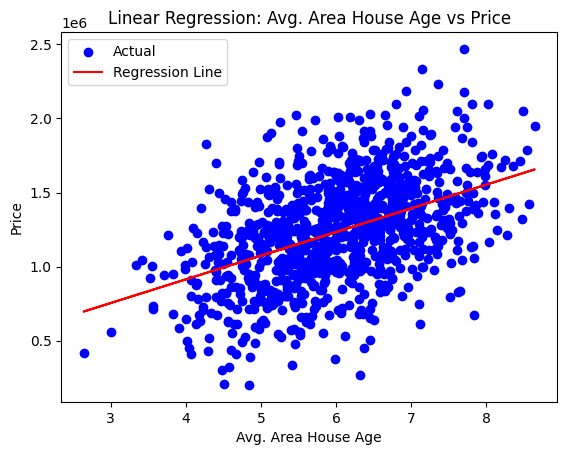

In [12]:
# Scatter plot with regression line 
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line') 
plt.xlabel("Avg. Area House Age") 
plt.ylabel("Price") 
plt.title("Linear Regression: Avg. Area House Age vs Price")
plt.legend()
plt.show()